LOADING AND INSPECTING THE DATASET

In [9]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv")
print(df.head())
print(df.info())
print(df.describe())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


DATA PREPROCESSING

In [11]:
# Check for missing values
print(df.isnull().sum())

# Define features and target variable
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Display the first few rows of the features and target variable
print(X.head())
print(y.head())


Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


SPLIT DATA INTO TRAINING AND TESTING DATASETS

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the train and test sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(280, 2) (120, 2)
(280,) (120,)


TRAINING AND TESTING OF DECISION TREE CLASSIFIER

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.81      0.81      0.81        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120

Confusion Matrix:
[[64  9]
 [ 9 38]]


VISUALIZING THE DECISION TREE

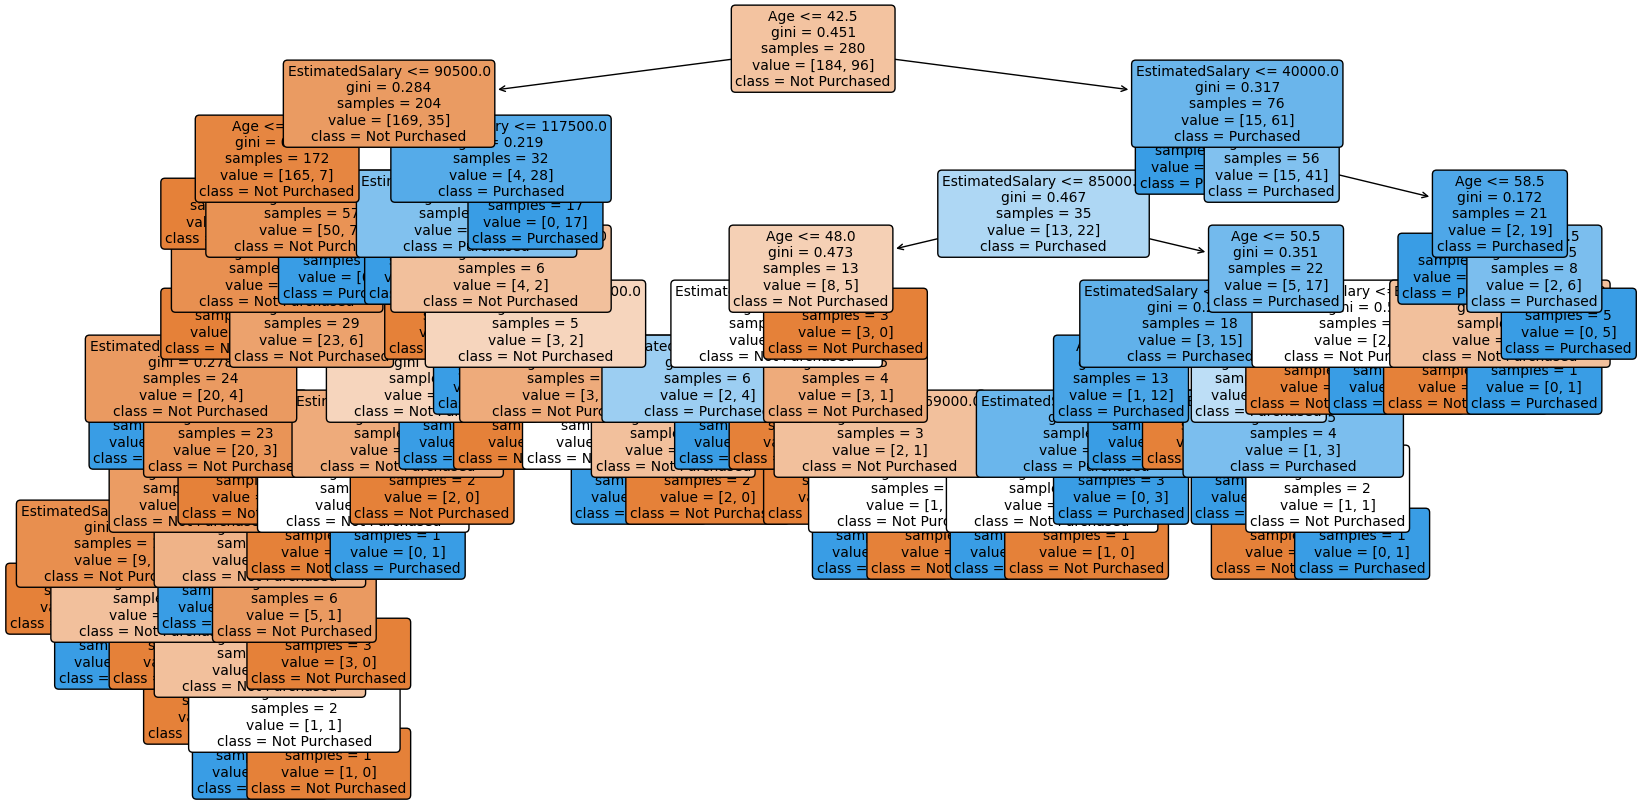

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True, rounded=True, fontsize=10)
plt.show()
